In [46]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn import svm

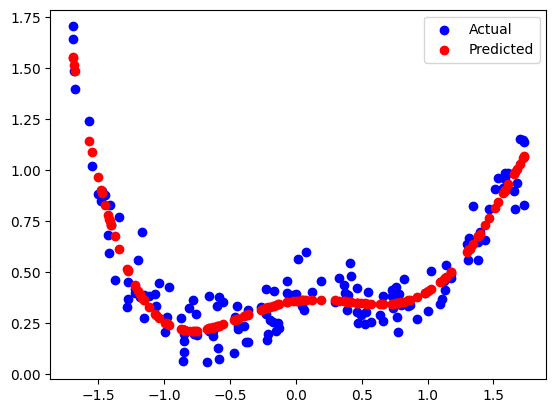

In [47]:
data = pd.read_csv("dataset0.csv")

x = data["x"].values.reshape(-1, 1)
y = data["y"].values

x_train, x_test, y_train, y_test = train_test_split(x, y)

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

lin = LinearRegression()
poly = PolynomialFeatures(degree=6)

x_poly_train = poly.fit_transform(x_train_scaler)
x_test_poly = poly.transform(x_test_scaler)

poly.fit(x_poly_train, y_train)
lin.fit(x_poly_train, y_train)

y_pred = lin.predict(x_test_poly)
y_pred_train = lin.predict(x_poly_train)

plt.scatter(x_poly_train[:, 1], y_train, color="blue", label="Actual")
plt.scatter(x_poly_train[:, 1], y_pred_train, color="red", label="Predicted")
plt.legend()
plt.show()

In [49]:
kf = KFold(n_splits=5)
clf = svm.SVR(kernel='poly')

# Führe die Cross-Validation durch
scores = cross_val_score(clf, x, y, cv=kf, scoring='neg_mean_squared_error')

# Die 'neg_mean_squared_error' Metrik wird verwendet, da cross_val_score die maximale statt der minimalen Werte maximieren soll.

# Drucke die Ergebnisse
print("Cross-Validation Scores (negative mean squared error):", scores)
print("Durchschnittlicher Score:", np.mean(scores))

Cross-Validation Scores (negative mean squared error): [-0.1094706  -0.05022675 -0.07350785 -0.17583579 -0.13667344]
Durchschnittlicher Score: -0.10914288605931965
